In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
df = pd.read_csv('BPI_2017_rfc_xgboost.csv')

In [3]:
df.columns

Index(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name', 'case:RequestedAmount',
       'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'Selected', 'CreditScore', 'OfferedAmount', 'OfferID',
       'time_to_next_event', 'time_to_next_event_baseline',
       'concept:name next naive', 'concept:name next', 'concept:name next rfc',
       'time_to_next_event_xgboost'],
      dtype='object')

In [4]:
print(df['time_to_next_event'].describe())
print(df['time_to_next_event_baseline'].describe())
print(df['time_to_next_event_xgboost'].describe())

count             1201086
unique             302363
top       0 days 00:00:00
freq               248368
Name: time_to_next_event, dtype: object
count                    1201086
unique                        18
top       0 days 00:00:00.010000
freq                      342685
Name: time_to_next_event_baseline, dtype: object
count                    1201086
unique                     68712
top       0 days 00:00:02.400000
freq                      121183
Name: time_to_next_event_xgboost, dtype: object


In [5]:
# Convert to timedelta
df['time_to_next_event'] = pd.to_timedelta(df['time_to_next_event'])
df['time_to_next_event_baseline'] = pd.to_timedelta(
    df['time_to_next_event_baseline'])
df['time_to_next_event_xgboost'] = pd.to_timedelta(
    df['time_to_next_event_xgboost'])

# Extract total seconds and store in new columns
df['time_to_next_event_seconds'] = df['time_to_next_event'].dt.total_seconds()
df['time_to_next_event_baseline_seconds'] = df['time_to_next_event_baseline'].dt.total_seconds()
df['time_to_next_event_xgboost_seconds'] = df['time_to_next_event_xgboost'].dt.total_seconds()

In [6]:
df.head(10)

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,...,OfferID,time_to_next_event,time_to_next_event_baseline,concept:name next naive,concept:name next,concept:name next rfc,time_to_next_event_xgboost,time_to_next_event_seconds,time_to_next_event_baseline_seconds,time_to_next_event_xgboost_seconds
0,1,0,W_Handle leads,2,701700,6,0,5,1,25893,...,1,0 days 00:00:00.010000,0 days 00:00:35.170000,A_Incomplete,W_Complete application,W_Complete application,0 days 00:00:51.500000,0.01,35.17,51.500000
1,0,0,W_Complete application,2,630427,3,1,5,1,25893,...,1,0 days 00:00:00.010000,0 days 00:00:00.010000,A_Accepted,A_Concept,A_Concept,0 days 00:01:30.300003,0.01,0.01,90.300003
2,4,0,A_Concept,0,169678,1,2,5,1,25893,...,1,4 days 23:34:08.080000,2 days 01:50:47.740000,A_Cancelled,A_Create Application,A_Create Application,4 days 22:36:52.093750,430448.08,179447.74,427012.093750
3,0,0,A_Create Application,0,219155,1,3,7,1,11273,...,1,0 days 00:00:00.050000,0 days 00:00:00.040000,A_Concept,A_Submitted,A_Submitted,0 days 00:00:42.099998,0.05,0.04,42.099998
4,4,0,A_Submitted,0,130912,1,4,7,1,11273,...,1,0 days 00:00:00.190000,0 days 00:00:00.300000,A_Pending,W_Handle leads,W_Handle leads,0 days 00:00:58.900002,0.19,0.30,58.900002
5,0,0,W_Handle leads,2,1134763,3,5,7,1,11273,...,1,0 days 00:01:19.830000,0 days 00:00:35.170000,A_Pending,W_Handle leads,W_Handle leads,0 days 00:00:39.599998,79.83,35.17,39.599998
6,1,0,W_Handle leads,2,552214,6,6,7,1,11273,...,1,0 days 00:00:00.010000,0 days 00:00:35.170000,A_Incomplete,W_Complete application,W_Complete application,0 days 00:00:51.500000,0.01,35.17,51.500000
7,0,0,W_Complete application,2,713660,3,7,7,1,11273,...,1,0 days 00:00:00.010000,0 days 00:00:00.010000,A_Accepted,A_Concept,A_Concept,0 days 00:01:30.300003,0.01,0.01,90.300003
8,4,0,A_Concept,0,145843,1,8,7,1,11273,...,1,4 days 22:46:23.370000,2 days 01:50:47.740000,A_Cancelled,A_Create Application,A_Create Application,5 days 02:24:57.312500,427583.37,179447.74,440697.312500
9,0,0,A_Create Application,0,230155,1,9,7,1,22285,...,1,0 days 00:00:00.060000,0 days 00:00:00.040000,A_Concept,A_Submitted,A_Submitted,0 days 00:00:42.099998,0.06,0.04,42.099998


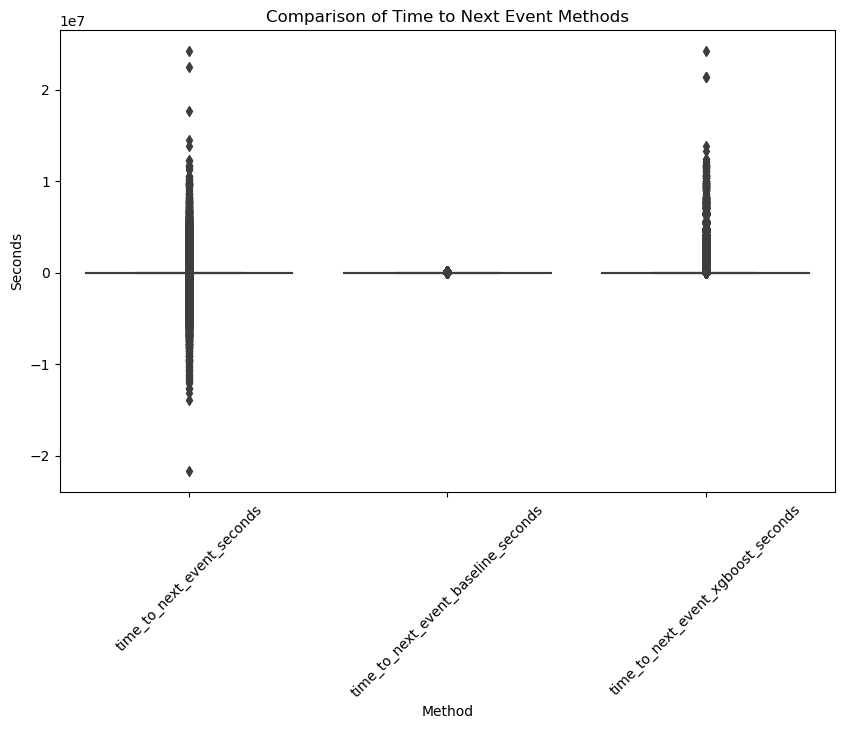

In [7]:
# Prepare data for boxplot
data_to_plot = df[['time_to_next_event_seconds',
                   'time_to_next_event_baseline_seconds', 'time_to_next_event_xgboost_seconds']]
data_to_plot = data_to_plot.melt(var_name='Method', value_name='Seconds')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='Seconds', data=data_to_plot)
plt.title('Comparison of Time to Next Event Methods')
plt.xticks(rotation=45)
plt.show()

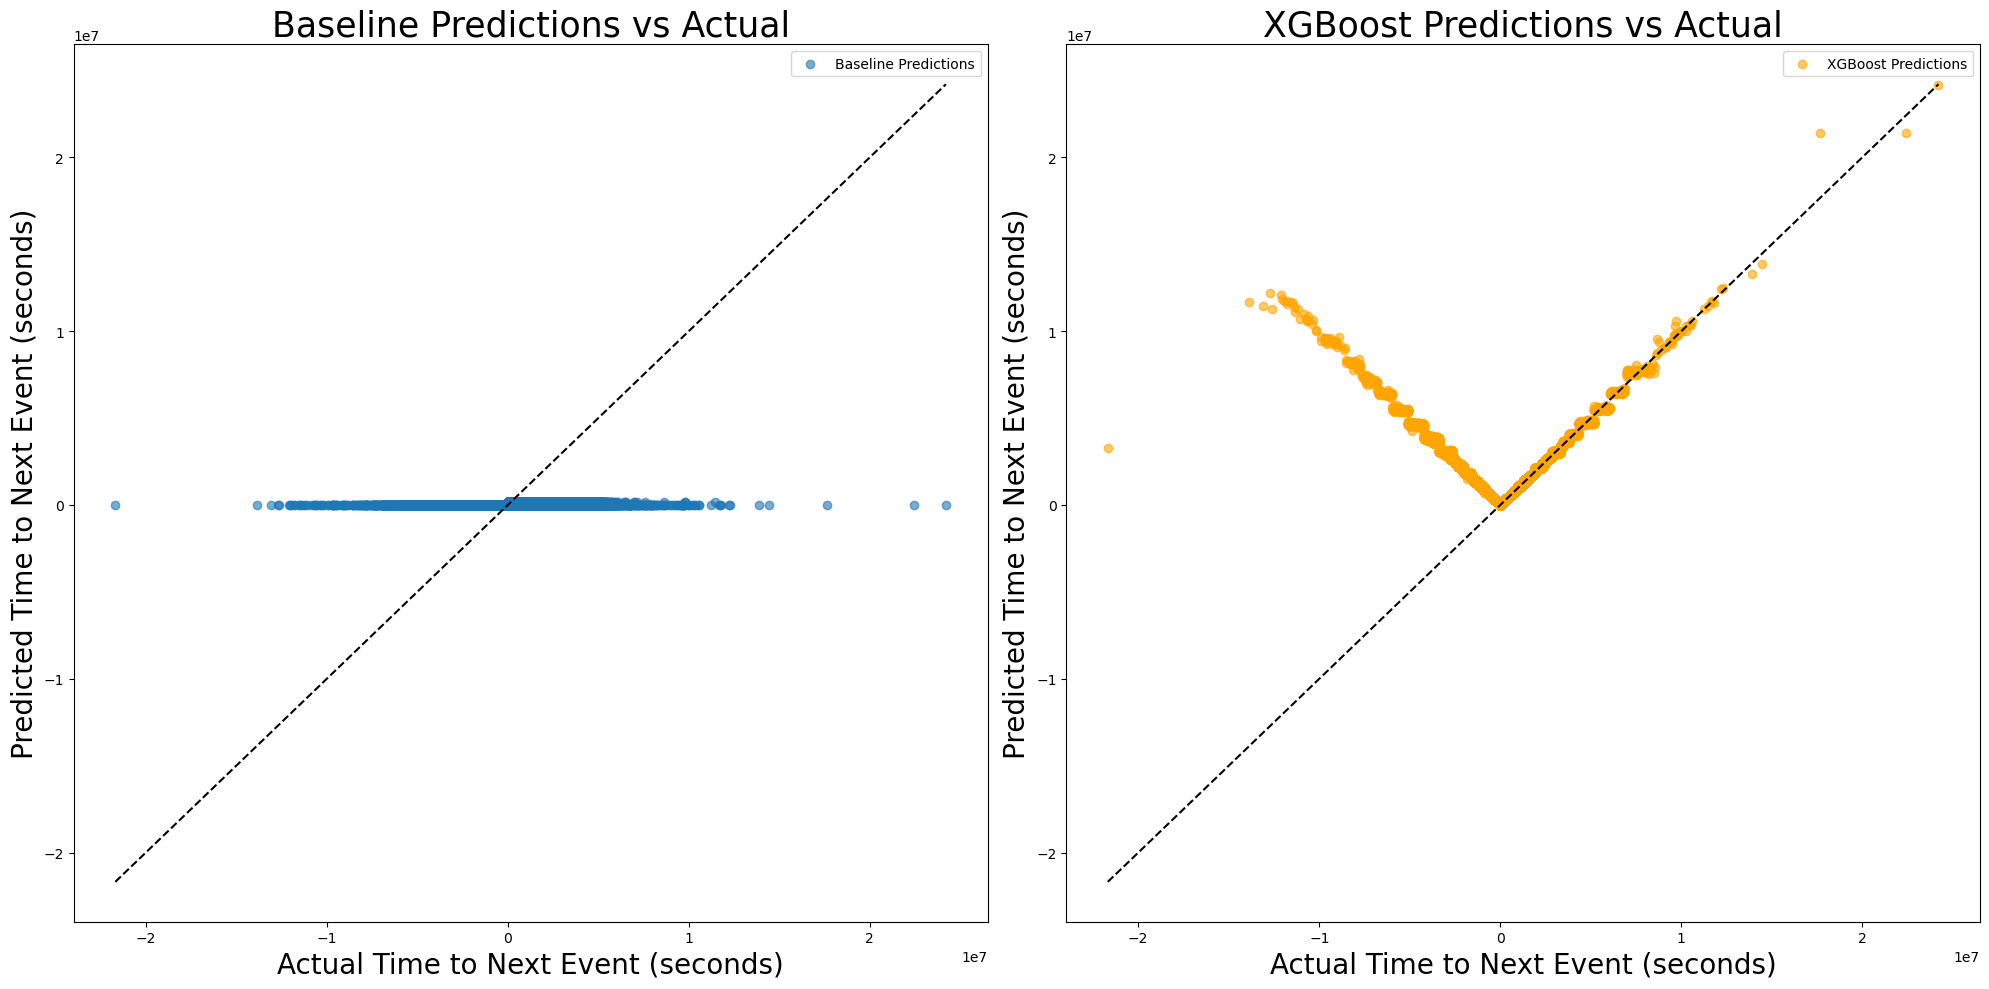

In [8]:
# Scatter plot for baseline predictions vs actual
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df['time_to_next_event_seconds'],
            df['time_to_next_event_baseline_seconds'], alpha=0.6, label='Baseline Predictions')
plt.plot([df['time_to_next_event_seconds'].min(), df['time_to_next_event_seconds'].max()], [
         # Diagonal line for reference
         df['time_to_next_event_seconds'].min(), df['time_to_next_event_seconds'].max()], 'k--')
plt.title('Baseline Predictions vs Actual', fontsize = 25)
plt.xlabel('Actual Time to Next Event (seconds)',fontsize = 20)
plt.ylabel('Predicted Time to Next Event (seconds)', fontsize=20)
plt.legend()

# Scatter plot for XGBoost predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(df['time_to_next_event_seconds'], df['time_to_next_event_xgboost_seconds'],
            alpha=0.6, color='orange', label='XGBoost Predictions')
plt.plot([df['time_to_next_event_seconds'].min(), df['time_to_next_event_seconds'].max()], [
         # Diagonal line for reference
         df['time_to_next_event_seconds'].min(), df['time_to_next_event_seconds'].max()], 'k--')
plt.title('XGBoost Predictions vs Actual', fontsize=25)
plt.xlabel('Actual Time to Next Event (seconds)', fontsize=20)
plt.ylabel('Predicted Time to Next Event (seconds)', fontsize=20)
plt.legend()

plt.tight_layout()
plt.show()

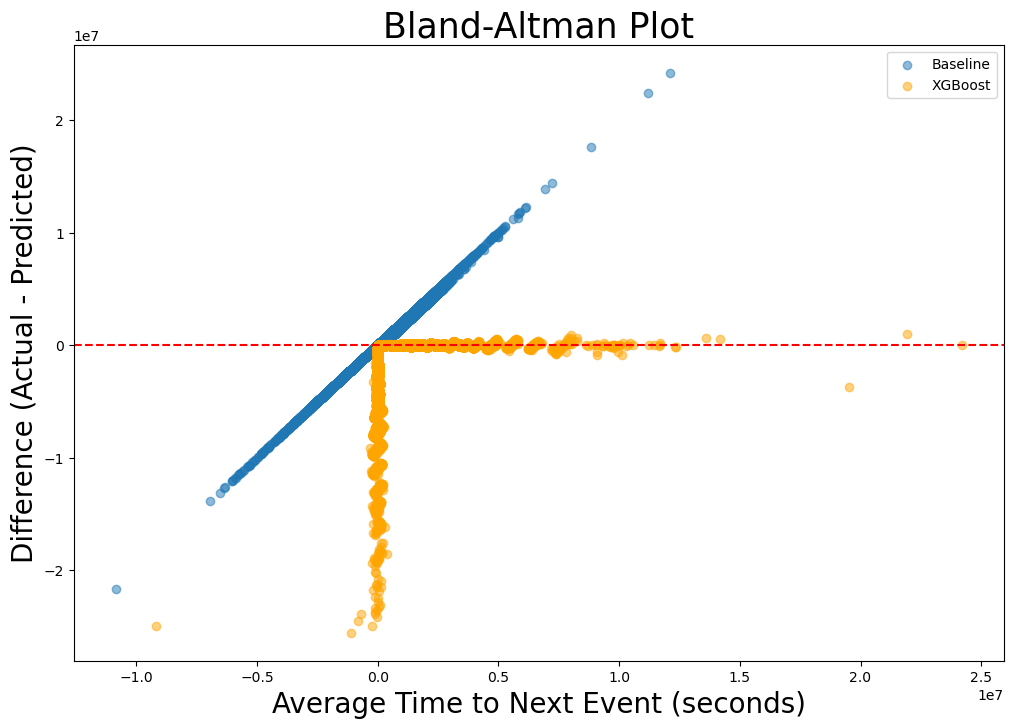

In [9]:
plt.figure(figsize=(12, 8))

# Calculating mean and difference
mean_baseline = (df['time_to_next_event_seconds'] +
                 df['time_to_next_event_baseline_seconds']) / 2
diff_baseline = df['time_to_next_event_seconds'] - \
    df['time_to_next_event_baseline_seconds']

mean_xgboost = (df['time_to_next_event_seconds'] +
                df['time_to_next_event_xgboost_seconds']) / 2
diff_xgboost = df['time_to_next_event_seconds'] - \
    df['time_to_next_event_xgboost_seconds']

# Plotting
plt.scatter(mean_baseline, diff_baseline, alpha=0.5, label='Baseline')
plt.scatter(mean_xgboost, diff_xgboost, alpha=0.5,
            color='orange', label='XGBoost')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Bland-Altman Plot', fontsize=25)
plt.xlabel('Average Time to Next Event (seconds)', fontsize=20)
plt.ylabel('Difference (Actual - Predicted)', fontsize=20)
plt.legend()
plt.show()

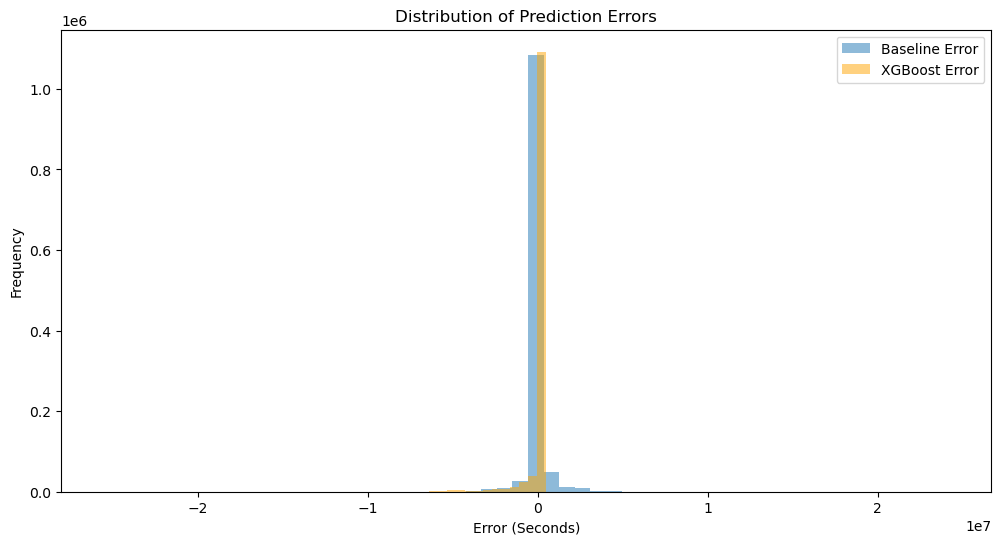

In [10]:
df['baseline_error'] = df['time_to_next_event_seconds'] - \
    df['time_to_next_event_baseline_seconds']
df['xgboost_error'] = df['time_to_next_event_seconds'] - \
    df['time_to_next_event_xgboost_seconds']

plt.figure(figsize=(12, 6))

# Plotting the errors
plt.hist(df['baseline_error'], bins=50, alpha=0.5, label='Baseline Error')
plt.hist(df['xgboost_error'], bins=50, alpha=0.5,
         label='XGBoost Error', color='orange')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Seconds)')
plt.ylabel('Frequency')
plt.legend()

plt.show()

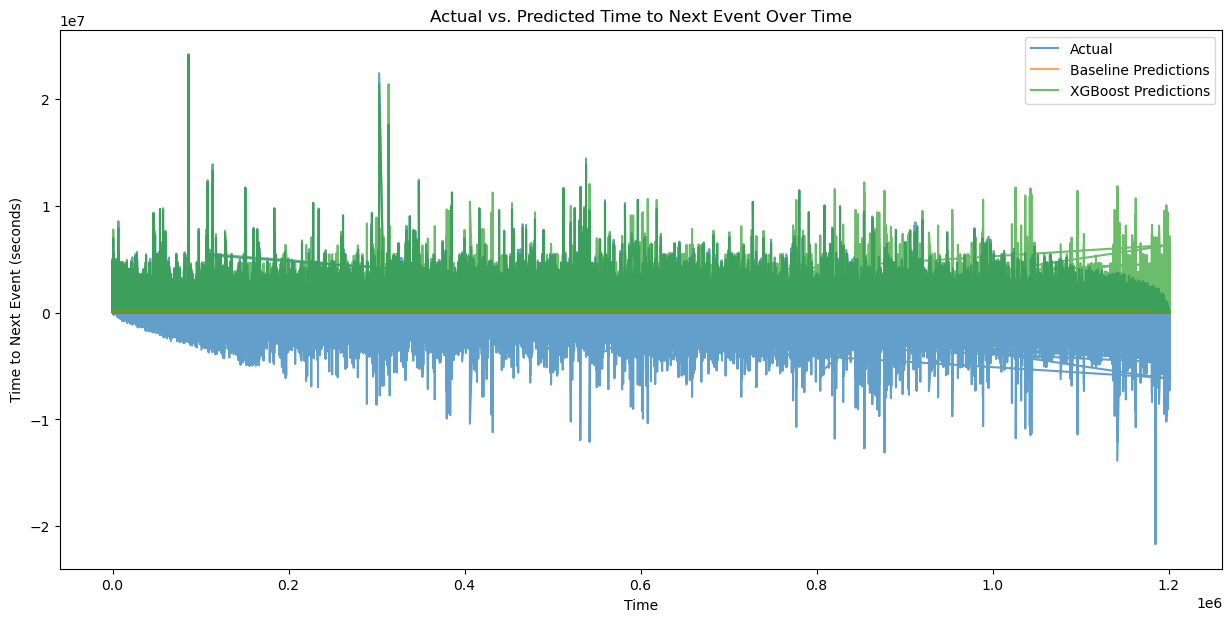

In [11]:
# Assuming you have a 'timestamp' column to plot as a time series
df.set_index('time:timestamp', inplace=True)

plt.figure(figsize=(15, 7))

# Actual values
df['time_to_next_event_seconds'].plot(label='Actual', alpha=0.7)

# Predictions
df['time_to_next_event_baseline_seconds'].plot(
    label='Baseline Predictions', alpha=0.7)
df['time_to_next_event_xgboost_seconds'].plot(
    label='XGBoost Predictions', alpha=0.7)

plt.title('Actual vs. Predicted Time to Next Event Over Time')
plt.xlabel('Time')
plt.ylabel('Time to Next Event (seconds)')
plt.legend()
plt.show()

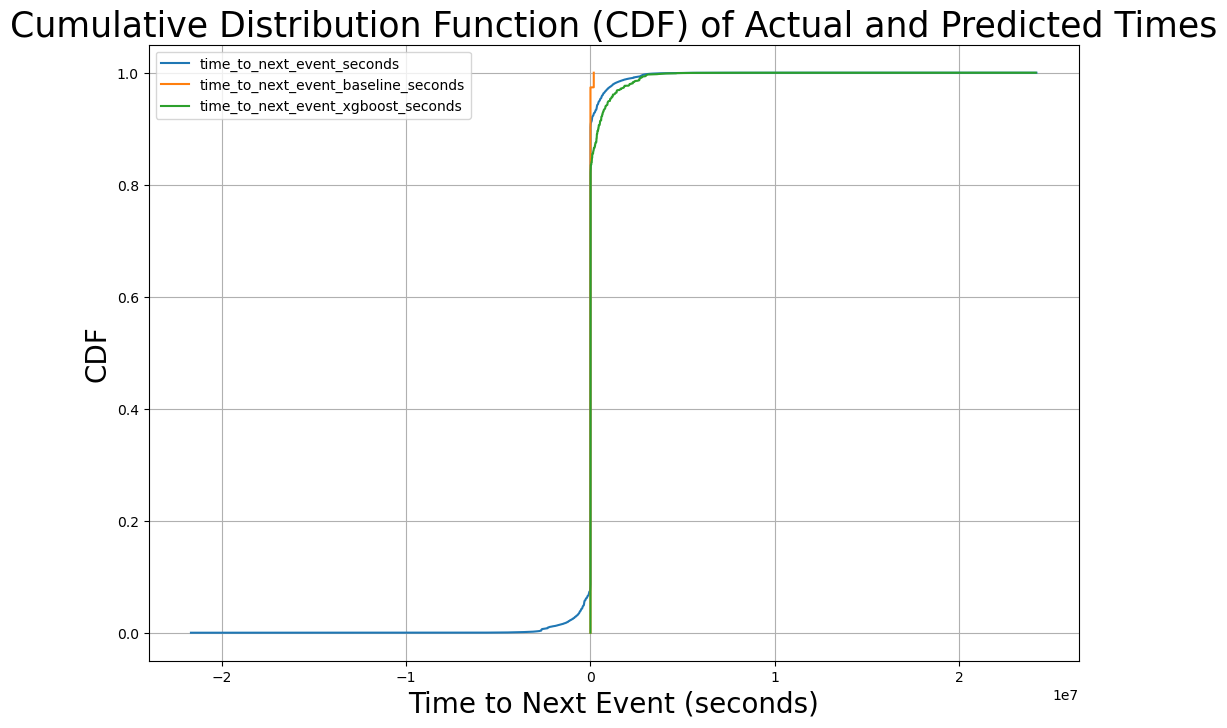

In [12]:
plt.figure(figsize=(12, 8))

# Calculating CDF
for column in ['time_to_next_event_seconds', 'time_to_next_event_baseline_seconds', 'time_to_next_event_xgboost_seconds']:
    # Sort data
    sorted_data = np.sort(df[column])
    # Calculate CDF
    yvals = np.arange(len(sorted_data))/float(len(sorted_data)-1)
    plt.plot(sorted_data, yvals, label=column)

plt.title(
    'Cumulative Distribution Function (CDF) of Actual and Predicted Times', fontsize=25)
plt.xlabel('Time to Next Event (seconds)', fontsize=20)
plt.ylabel('CDF', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

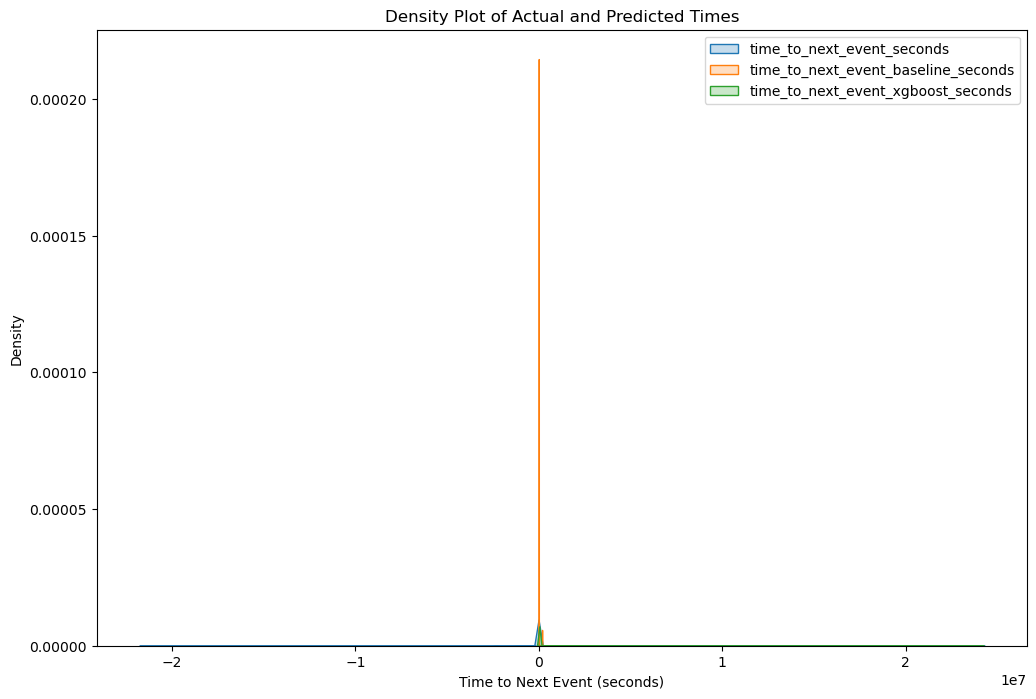

In [13]:
plt.figure(figsize=(12, 8))

# Plotting density
for column in ['time_to_next_event_seconds', 'time_to_next_event_baseline_seconds', 'time_to_next_event_xgboost_seconds']:
    sns.kdeplot(df[column], label=column, fill=True)

plt.title('Density Plot of Actual and Predicted Times')
plt.xlabel('Time to Next Event (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

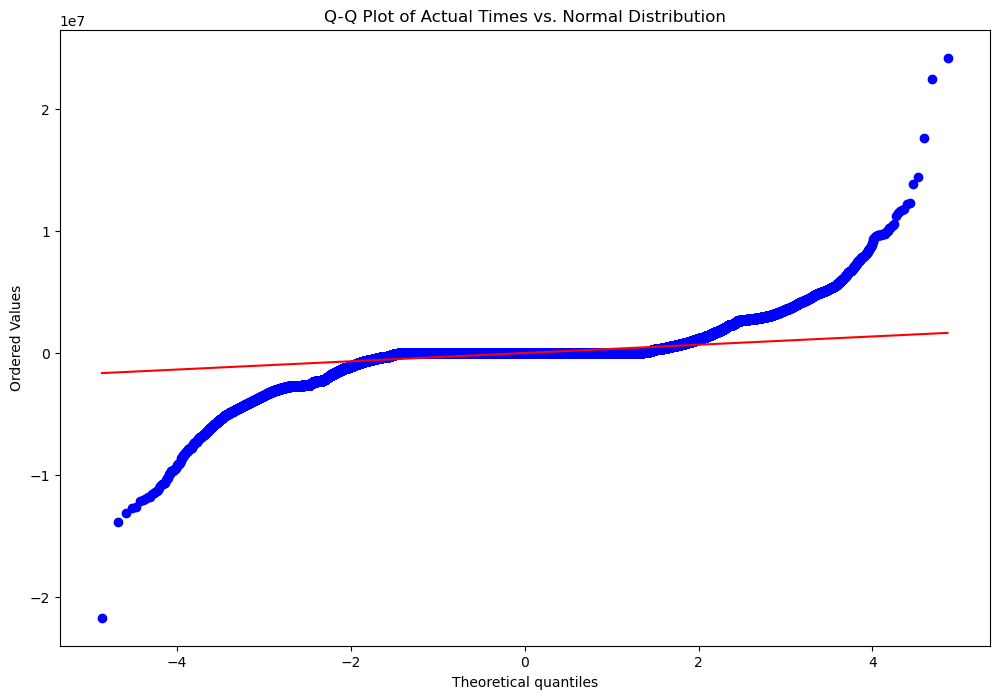

In [14]:
import scipy.stats as stats

plt.figure(figsize=(12, 8))

# Q-Q plot for actual values vs. normal distribution
stats.probplot(df['time_to_next_event_seconds'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actual Times vs. Normal Distribution')
plt.show()

# Note: To compare actual to predicted, you might need to adjust or use a similar method tailored for comparing two samples.

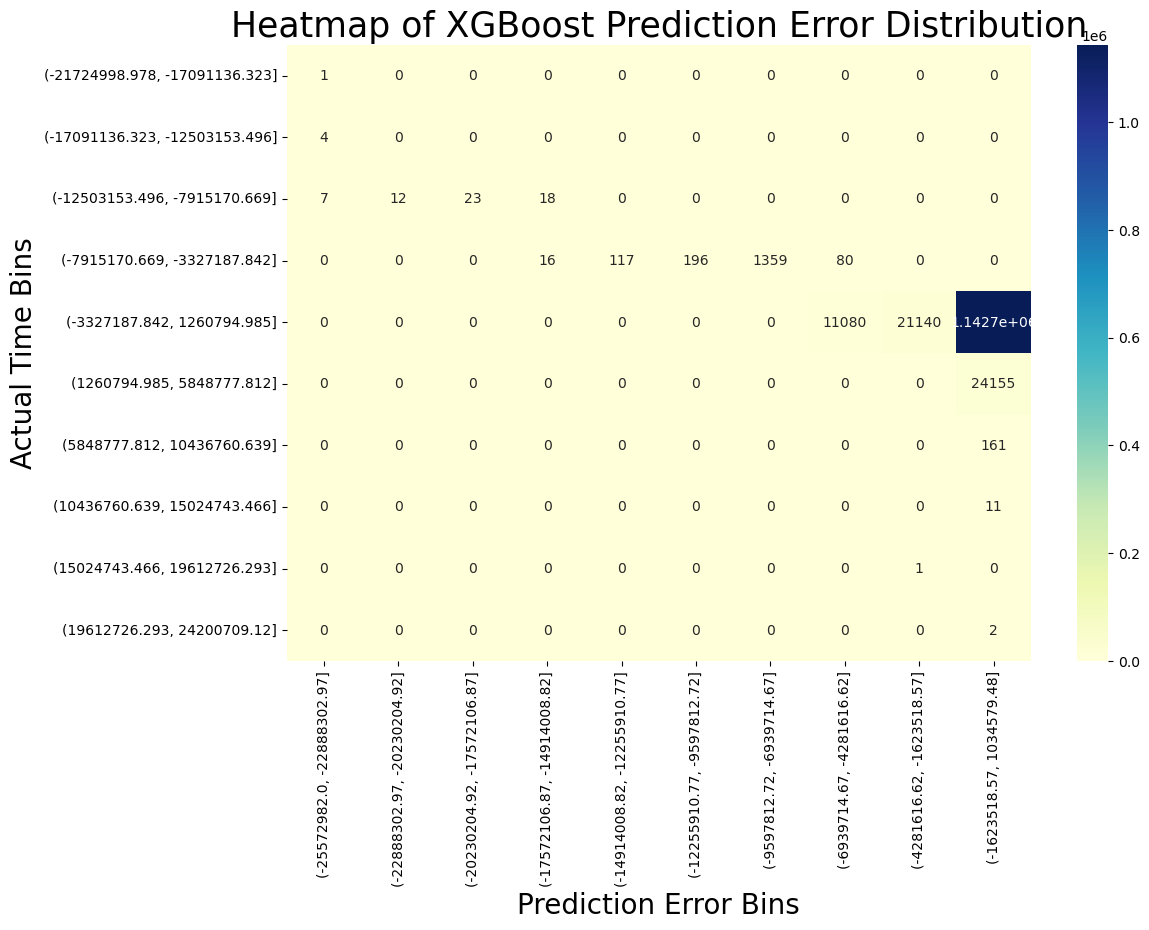

In [15]:
# Example: Creating a heatmap of prediction error distribution for the XGBoost model

# First, categorize or bin both actual times and prediction errors
df['actual_time_bins'] = pd.cut(df['time_to_next_event_seconds'], bins=10)
df['xgboost_error_bins'] = pd.cut(df['xgboost_error'], bins=10)

# Create a crosstab to count occurrences in each bin combination
error_distribution = pd.crosstab(
    df['actual_time_bins'], df['xgboost_error_bins'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(error_distribution, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of XGBoost Prediction Error Distribution', fontsize=25)
plt.xlabel('Prediction Error Bins', fontsize=20)
plt.ylabel('Actual Time Bins', fontsize=20)
plt.show()

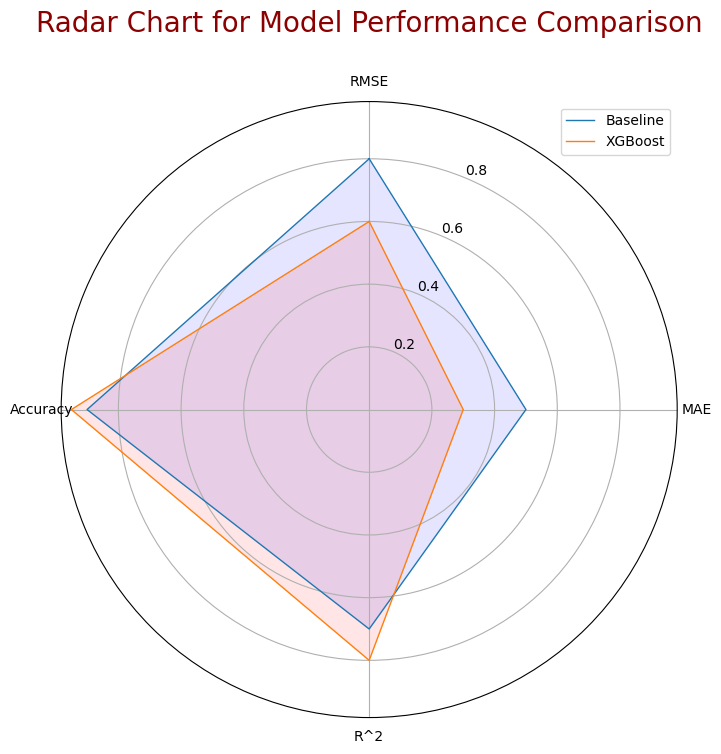

In [16]:
# Example metrics for each model
metrics = ['RMSE', 'MAE', 'R^2', 'Accuracy']
baseline_values = [0.8, 0.5, 0.7, 0.9]  # Example values
xgboost_values = [0.6, 0.3, 0.8, 0.95]

# Number of variables we're plotting.
num_vars = len(metrics)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# First model
ax.plot(angles, baseline_values +
        baseline_values[:1], linewidth=1, linestyle='solid', label='Baseline')
ax.fill(angles, baseline_values + baseline_values[:1], 'b', alpha=0.1)

# Second model
ax.plot(angles, xgboost_values +
        xgboost_values[:1], linewidth=1, linestyle='solid', label='XGBoost')
ax.fill(angles, xgboost_values + xgboost_values[:1], 'r', alpha=0.1)

# Beautify the plot
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([n * 360.0 / num_vars for n in range(num_vars)], metrics)
ax.legend(loc='upper right')
plt.title('Radar Chart for Model Performance Comparison',
          size=20, color='darkred', y=1.1)

plt.show()

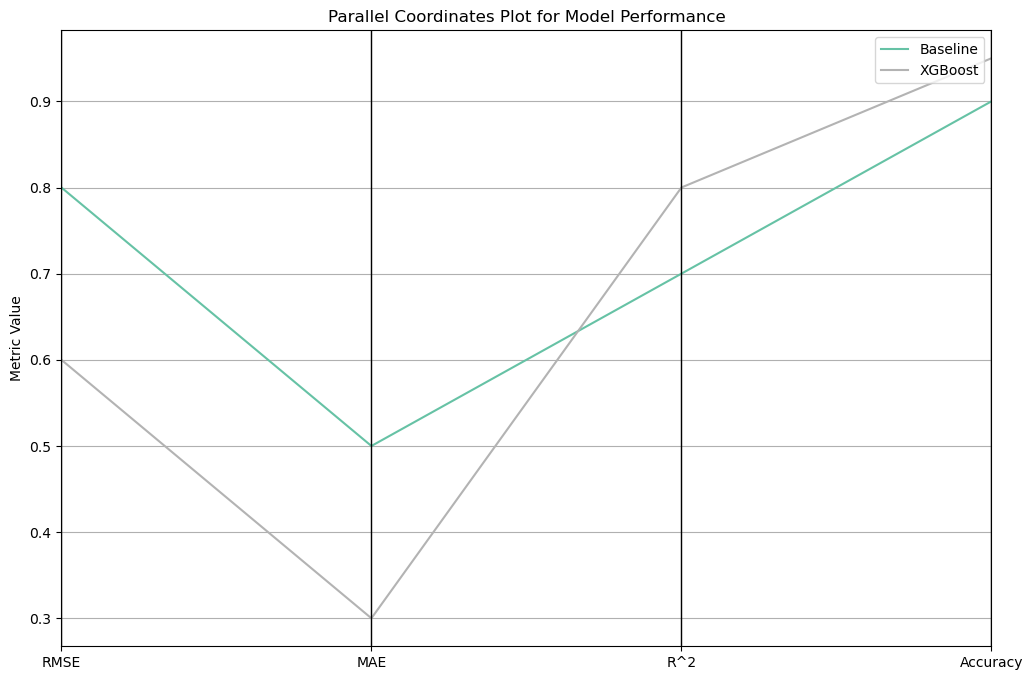

In [17]:
from pandas.plotting import parallel_coordinates

# Prepare a DataFrame for demonstration
data = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R^2', 'Accuracy'],
    'Baseline': [0.8, 0.5, 0.7, 0.9],
    'XGBoost': [0.6, 0.3, 0.8, 0.95]
})

# Making 'Metric' the index for plotting
data = data.set_index('Metric').T.reset_index()

plt.figure(figsize=(12, 8))
parallel_coordinates(data, 'index', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot for Model Performance')
plt.ylabel('Metric Value')
plt.show()